AE의 특징은 기존 인풋을 압축했다가 다시 복구 하는 과정에서 내가 필요로하는 특징만을 추출한다는 데 있다. 이를 응용하여 노이즈가 낀 이미지의 노이즈제거에도 응용할 수 있는데, 원리는 다음과 같다. 

- 이미지를 저차원으로 압축 할 때에는 그 이미지의 중요정보만 추출하고 나머지는 버려진다. 
- 주어진 이미지를 이루는 Feature만 학습할 경우에 Noise는 Feature에 포함되지 않는다.
- 따라서 저차원으로 압축후 복구하면 불필요한 Feature는 버려지는데 이 때 노이즈도 같이 버려지므로 디노이징에 사용될 수 있다.



손글씨는 많이 해봤으니, 다른 데이터를 써보자

In [20]:
import keras 
import numpy as np
import matplotlib.pyplot as plt

In [35]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [47]:
x_train = x_train / 255.0
x_test = x_test / 255.0

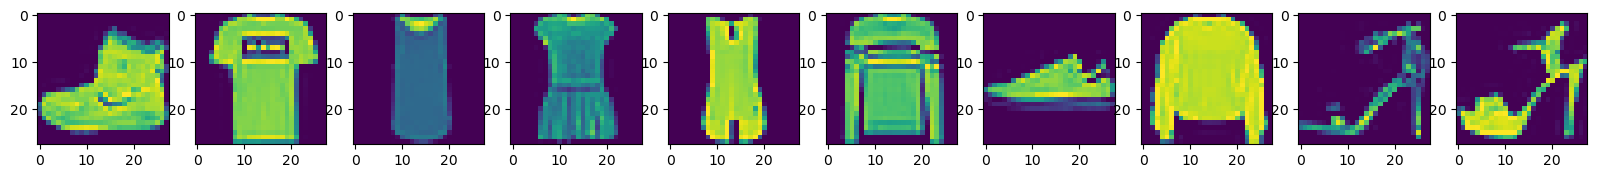

In [48]:
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow( x_train[i])

In [51]:
x_train.shape

(60000, 28, 28)

In [56]:
#add noise 
noise_train = np.random.uniform(-0.5, 0.5, 60000*28*28).reshape((-1, 28, 28))
noise_test =  np.random.uniform(-0.5, 0.5, 10000*28*28).reshape((-1, 28, 28))


In [57]:
x_train_noisy = x_train + noise_train
x_test_noisy = x_test + noise_test

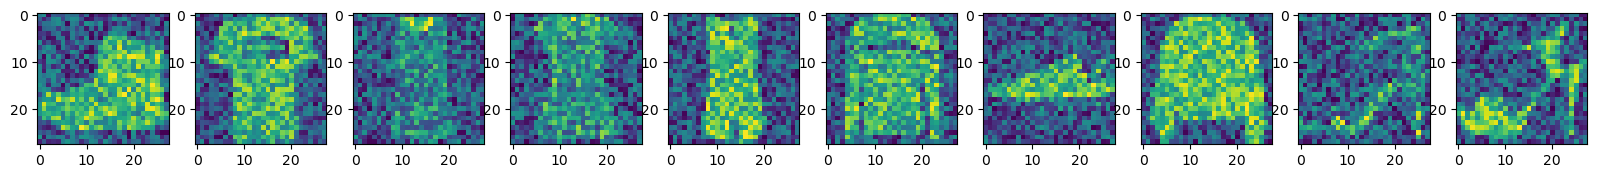

In [58]:
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow( x_train_noisy[i])

In [59]:
# keras에서 기본으로 제공하는 Model 을 상속 받아서 사용
from keras import Model

class Autoencoder(Model):
  def __init__(self): # 초기화 
    super(Autoencoder, self).__init__() # 부모의 초기화 루틴 사용

    self.encoder = keras.Sequential()
    self.encoder.add( keras.layers.Flatten())
    self.encoder.add( keras.layers.Dense(128, activation='relu'))
    self.encoder.add( keras.layers.Dense(64, activation='relu'))
    self.encoder.add( keras.layers.Dense(32, activation='relu')) 
    
    self.decoder = keras.Sequential()
    self.decoder.add( keras.layers.Dense(64, activation='relu'))
    self.decoder.add( keras.layers.Dense(128, activation='relu'))
    self.decoder.add( keras.layers.Dense(784, activation='sigmoid'))
    self.decoder.add( keras.layers.Reshape(target_shape=(28,28)))
  
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded



In [60]:
DAE = Autoencoder()

In [61]:
DAE.compile( optimizer= 'adam', loss='mse')

In [62]:
DAE.fit( x = x_train_noisy, y = x_train, epochs=25, shuffle=True)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0392
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0191
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0169
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0158
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0150
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0146
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0143
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0139
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0138
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0135
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0135
Epoch 12/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0134
Epoch 13/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0132
Epoch 14/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0131
Epoch 15/25
1875/1875 ━━━━━━━

In [63]:
encoded_imgs = DAE.encoder(x_test_noisy).numpy()
decoded_imgs = DAE.decoder(encoded_imgs).numpy()

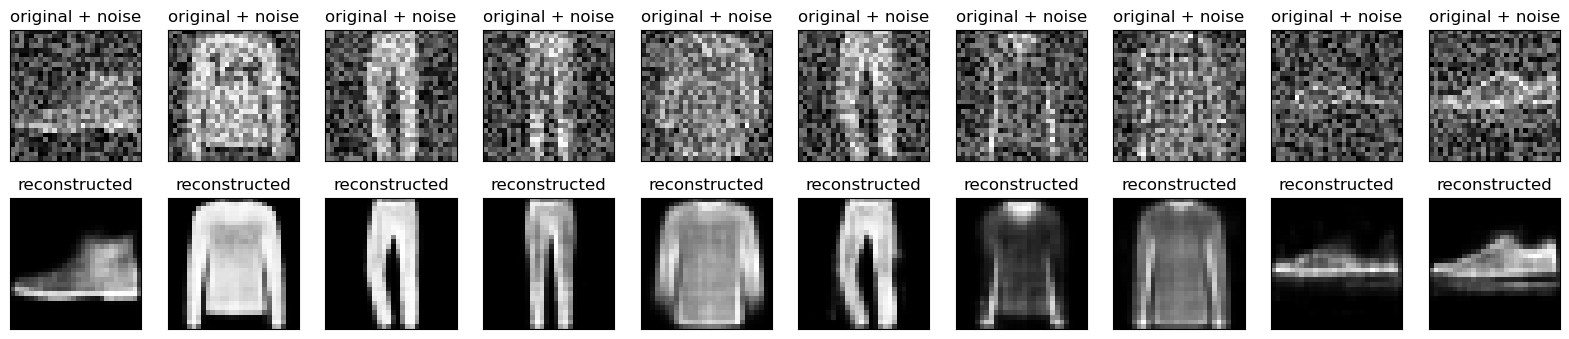

In [65]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow((x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow((decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()